In [35]:
import pandas as pd
import numpy as np

#Various visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches # for custom legend
import plotly_express as px

# Acknowledgements
Many thanks to Eva Murray and Andy Kriebel, for their incredible work and dedication in running the Makeover Monday community project.

# References
<p>Makeover Monday Week 13: http://www.makeovermonday.co.uk/data/
<p>Original Article: https://finance.yahoo.com/news/chart-reveals-huge-difference-millennials-201133732.html
<p>Data on data.world: https://data.world/makeovermonday/2019w13
<p>nbviewer link for this notebook: https://nbviewer.jupyter.org/github/sjglass/makeover_monday_python_project/blob/master/2019W13_ConsumerSpending/MakeoverMonday_2019W13.ipynb
https://bit.ly/2uGp7gV

In [36]:
# Import data
df_data = pd.read_csv('Consumer Spending by Generation.csv')
df_data.head()

,Generation,Category,% of Spending
0,Millenials,Restaurants,0.238
1,Millenials,Groceries,0.217
2,Millenials,Gasoline,0.108
3,Millenials,Pharmacies,0.030
4,Millenials,Furniture/Building,0.045


In [37]:
# It's difficult to show all 7 categories # 4 Generations in one row or column of bar charts
# Assigning each category a number (based on overall percent spending)
# allows, for example, a trellis chart based on the rank
# Although FWIW 7 is a terrible number for trellis charts too.
# Also, it turns out that SNS catplot can create a trellis by just specifying a width
# and setting the col_wrap parameter, so I didn't end up using the col and row
# Leaving it here for furture reference

cat_means = df_data.groupby("Category").mean().reset_index().rename(index=str, columns={"% of Spending": "Cat Mean % of Spending"})
# dense ranks should always be integers
cat_means['Category Rank']=cat_means['Cat Mean % of Spending'].rank(ascending=0,method='dense').astype(int)
cat_means['row']=((cat_means['Category Rank'].astype(int)-1)/3 + 1).astype(int)
cat_means['col']=(cat_means['Category Rank']%3).replace(0, 3).astype(int)
df_data = df_data.merge(cat_means, on='Category')
df_data.head()

,Generation,Category,% of Spending,Cat Mean % of Spending,Category Rank,row,col
0,Millenials,Restaurants,0.238,0.1695,3,1,3
1,Generation X,Restaurants,0.177,0.1695,3,1,3
2,Baby Boomers,Restaurants,0.135,0.1695,3,1,3
3,Traditionalists,Restaurants,0.128,0.1695,3,1,3
4,Millenials,Groceries,0.217,0.2615,1,1,1


In [38]:
# Assign a default order to Generation values by using the Categorical type
df_data['Generation'] = pd.Categorical(df_data['Generation'], \
    ["Millenials", "Generation X", "Baby Boomers", "Traditionalists"])
df_data = df_data.sort_values('Generation')
df_data.head()

,Generation,Category,% of Spending,Cat Mean % of Spending,Category Rank,row,col
0,Millenials,Restaurants,0.238,0.1695,3,1,3
24,Millenials,General/Misc,0.177,0.2070,2,1,2
4,Millenials,Groceries,0.217,0.2615,1,1,1
20,Millenials,Elec/Hobbies/Clothing,0.185,0.1545,4,2,1
16,Millenials,Furniture/Building,0.045,0.0780,6,2,3


In [43]:
# pyplot does not pay attention to the categorical order
# Instead, create a numerical mapping to use for pyplot
def gen_order(gen):
    if gen == 'Millenials':
        return 1
    elif gen == 'Generation X':
        return 2
    elif gen == 'Baby Boomers':
        return 3
    elif gen == 'Traditionalists':
        return 4
df_data['Generation Rank'] = df_data['Generation'].apply(gen_order)
df_data.sample(10)

,Generation,Category,% of Spending,Cat Mean % of Spending,Category Rank,row,col,Generation Rank
21,Generation X,Elec/Hobbies/Clothing,0.168,0.1545,4,2,1,2
19,Traditionalists,Furniture/Building,0.094,0.0780,6,2,3,4
4,Millenials,Groceries,0.217,0.2615,1,1,1,1
18,Baby Boomers,Furniture/Building,0.100,0.0780,6,2,3,3
22,Baby Boomers,Elec/Hobbies/Clothing,0.147,0.1545,4,2,1,3
12,Millenials,Pharmacies,0.030,0.0400,7,3,1,1
16,Millenials,Furniture/Building,0.045,0.0780,6,2,3,1
17,Generation X,Furniture/Building,0.073,0.0780,6,2,3,2
26,Baby Boomers,General/Misc,0.223,0.2070,2,1,2,3
3,Traditionalists,Restaurants,0.128,0.1695,3,1,3,4


In [45]:
# For pyplot, also assign the color values
def gen_color(gen):
    if gen == 'Millenials':
        return 'red'
    elif gen == 'Generation X':
        return 'green'
    elif gen == 'Baby Boomers':
        return 'blue'
    elif gen == 'Traditionalists':
        return 'cyan'
df_data['Generation Color'] = df_data['Generation'].apply(gen_color)
df_data.sample(10)

,Generation,Category,% of Spending,Cat Mean % of Spending,Category Rank,row,col,Generation Rank,Generation Color
2,Baby Boomers,Restaurants,0.135,0.16950,3,1,3,3,blue
27,Traditionalists,General/Misc,0.225,0.20700,2,1,2,4,cyan
20,Millenials,Elec/Hobbies/Clothing,0.185,0.15450,4,2,1,1,red
5,Generation X,Groceries,0.253,0.26150,1,1,1,2,green
8,Millenials,Gasoline,0.108,0.08925,5,2,2,1,red
15,Traditionalists,Pharmacies,0.064,0.04000,7,3,1,4,cyan
18,Baby Boomers,Furniture/Building,0.100,0.07800,6,2,3,3,blue
19,Traditionalists,Furniture/Building,0.094,0.07800,6,2,3,4,cyan
6,Baby Boomers,Groceries,0.272,0.26150,1,1,1,3,blue
10,Baby Boomers,Gasoline,0.085,0.08925,5,2,2,3,blue


In [39]:
px.bar(df_data.sort_values('Generation'), x='Generation', y='% of Spending', orientation='v', \
       facet_col='Category', color='Generation',\
    title='Percent of Spending By Category and Generation', \
    template='plotly')
# I can't seem to get the Generation to sort in anything other than alphabetical order
# Also not sure if I can remove or customize the overlapping labels

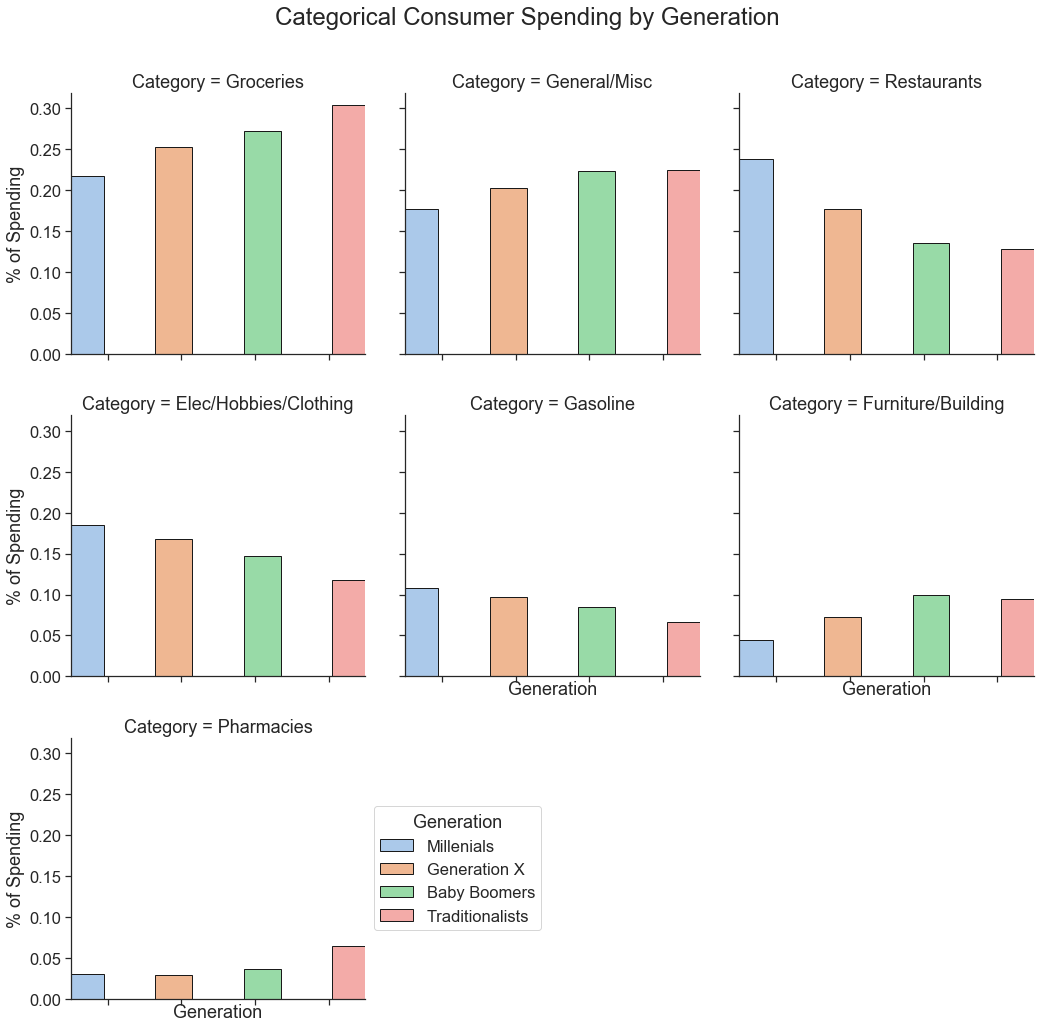

In [64]:
sns.set(font_scale=1.5)
sns.set_style("ticks") # This style has grid lines turned off

# catplot is a wrapper of Facetgrid - catplot is the preferred function to call
# Passing the Hue parameter causes the bars to become thin and off-center
# I haven't figured out a good way around it yet
# Palettes: https://seaborn.pydata.org/tutorial/color_palettes.html
g = sns.catplot(x="Generation", y="% of Spending", hue="Generation", col="Category", \
                data=df_data.sort_values('Category Rank'), kind="bar",\
           palette="pastel", edgecolor="k",col_wrap=3,legend=False, legend_out=True)

# See https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Categorical Consumer Spending by Generation', fontsize=24)

# I don't like where it places this legend
#g.add_legend(title="Generation") 

# This puts a legend for the last facet/plot to the right of the plot, which works out nicely
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Generation")

# X axis labels appear on just some plots, and they aren't clear.  Suppress them
# Also change bar width
# Code to change bar width from here: https://stackoverflow.com/questions/34888058/changing-width-of-bars-in-bar-chart-created-using-seaborn-factorplot
# STILL NOT LINING UP WITH TICKS
for i, ax in enumerate(g.axes.flat): 
    for tick in ax.get_xticklabels():
        tick.set_visible(False)
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = 0.5 - current_width

        # we change the bar width
        patch.set_width(0.5)

        # we recenter the bar
        patch.set_x(patch.get_x() - diff * 0.5)


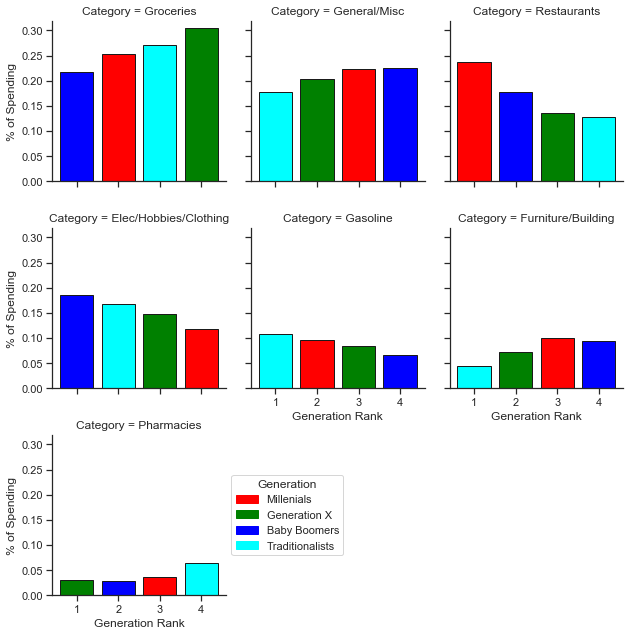

In [49]:
### COLORS ARE MESSED UP ON THIS - LEAVING TO RESOLVE LATER

# The color array doesn't make the bars thin like the hue parameter does
# However, there's no built in legend because it's just coloring 
# sequentially, not by category

sns.set(font_scale=1.0)
sns.set_style("ticks") # This style has grid lines turned off
g = sns.FacetGrid(df_data.sort_values('Category Rank'), col="Category", col_wrap=3, height=3)
g = g.map(plt.bar, "Generation Rank", "% of Spending", \
         edgecolor="k",linewidth='1',color=['red', 'green', 'blue', 'cyan'])

# See https://stackoverflow.com/questions/39500265/manually-add-legend-items-python-matplotlib
red_patch = mpatches.Patch(color='red', label='Millenials')
green_patch = mpatches.Patch(color='green', label='Generation X')
blue_patch = mpatches.Patch(color='blue', label='Baby Boomers')
cyan_patch = mpatches.Patch(color='cyan', label='Traditionalists')
plt.legend(handles=[red_patch,green_patch,blue_patch,cyan_patch], \
          loc='center left', bbox_to_anchor=(1, 0.5),title="Generation")

# X axis labels appear on just some plots, and they aren't clear.  Suppress them
#for i, ax in enumerate(g.axes.flat): 
#    for tick in ax.get_xticklabels():
#        tick.set_visible(False)

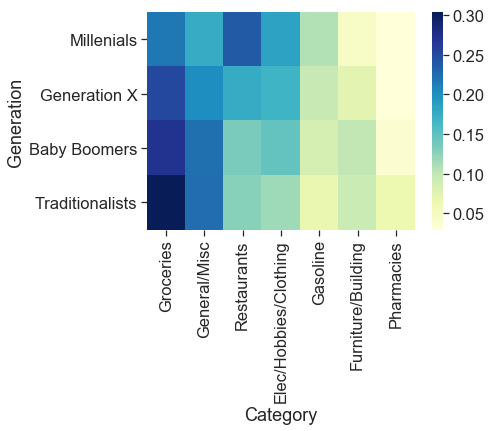

In [65]:
# Seaborn heatmap
df_data['Category'] = pd.Categorical(df_data['Category'], \
    ["Groceries", "General/Misc", "Restaurants", "Elec/Hobbies/Clothing", \
    "Gasoline","Furniture/Building","Pharmacies"])
df_data_pivot = df_data.pivot("Generation", "Category", "% of Spending")
# cmap options here: http://jose-coto.com/styling-with-seaborn
ax = sns.heatmap(df_data_pivot, cmap="YlGnBu")